<a href="https://colab.research.google.com/github/jay-thakur/Concept_of_Overfitting/blob/main/Concept_of_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1618]:
# loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

Simple Linear Regression

Multiple Linear Regression

Polynomial Linear Regression


# Linear Regression with Polynomial Features

In [1619]:
np.random.seed(2)

n_samples = 20
# uniform distribution
X = np.sort(np.random.uniform(0, 1, n_samples))
# print(X)

# Sample N from the normal gaussian distribution 
N = np.random.normal(0, 1)
# N = np.random.normal(0, 1, 20)
# print(N)

y = np.sin(2*np.pi*X) + N * 0.1
# print(y)

[]

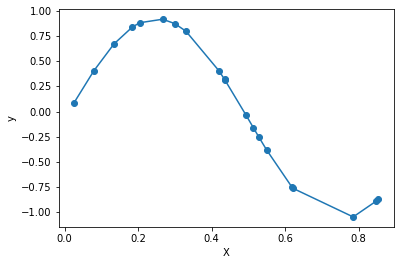

In [1620]:
# lets draw our graph
plt.scatter(X, y)
plt.plot(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.plot()

In [1621]:
# let's divide the dataset into train & test dataset
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.5)

In [1622]:
def show_plot(degree, X_train, y_train, X_test, preds):
  plt.scatter(X_train, y_train)
  # plt.plot(X, y, color='green')
  plt.plot(X_test, preds, color='m')
  plt.title('When order, M='+degree)
  plt.xlabel('X')
  plt.ylabel('y=sin(2*pi*X)+N')
  plt.xlim((0, 1))
  plt.ylim((-1, 1))
  plt.show()


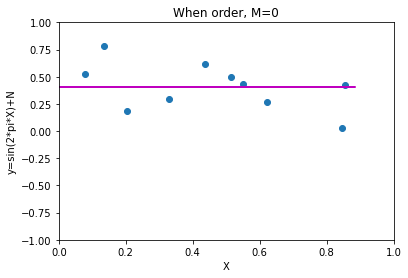

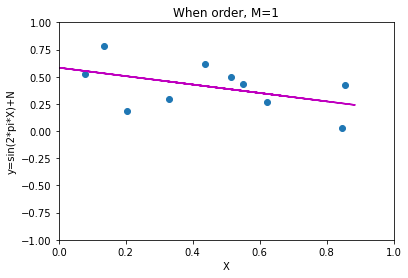

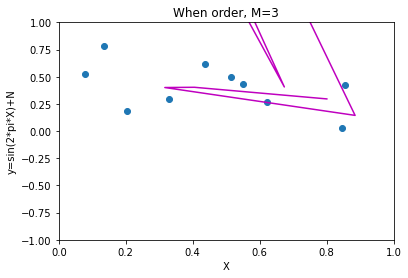

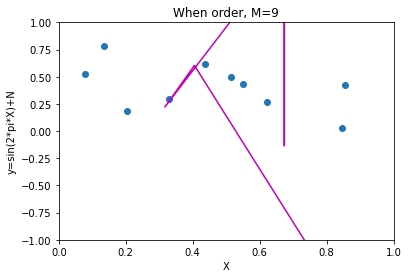

In [1623]:
degrees = [0, 1, 3, 9]
coefs_list = {}
for i in range(len(degrees)):
  # print(i)
  d = str(degrees[i])
  pipeline = make_pipeline(PolynomialFeatures(degrees[i]),LinearRegression())
  pipeline.fit(X_train[:, np.newaxis], y_train)
  preds = pipeline.predict(X_test[:, np.newaxis])
  coefs = np.polyfit(X_train, y_train, degrees[i])
  # print(coefs)
  # M = 'M'+ str(degrees[i])
  M = 'M'+ d
  # print(M)
  coefs_list[M] = coefs
  # print(weights)
  show_plot(d, X_train, y_train, X_test, preds)

## Displaying weights in Table 

In [1624]:
coefs_list

{'M0': array([0.40605233]),
 'M1': array([-0.3874399 ,  0.58311682]),
 'M3': array([-4.51586567,  6.26286736, -2.72181609,  0.77791365]),
 'M9': array([-7.87077921e+04,  3.23565853e+05, -5.55077613e+05,  5.14915098e+05,
        -2.79048362e+05,  8.85910169e+04, -1.54530554e+04,  1.21936341e+03,
        -1.51869276e+01, -9.80106376e-01])}

In [1625]:
M0_list = ["", "", "", "", "", "", "", "", ""]
M1_list = ["", "", "", "", "", "", "", ""]
M3_list = ["", "", "", "", "", ""]
M9_list = []

def append_list(coefs_list, degree, M, M_list):
  for i in range(0, degree+1):
    M_list.insert(i, coefs_list[M][i])

append_list(coefs_list, 0, 'M0', M0_list)
append_list(coefs_list, 1, 'M1', M1_list)
append_list(coefs_list, 3, 'M3', M3_list)
append_list(coefs_list, 9, 'M9', M9_list)

weights = {'M = 0': M0_list, 'M = 1': M1_list, 'M = 3': M3_list, 'M = 9': M9_list}
indexes = ['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9']

weights_df = pd.DataFrame(weights, index=indexes)
weights_df

,M = 0,M = 1,M = 3,M = 9
w0,0.406052,-0.38744,-4.51587,-78707.792138
w1,,0.583117,6.26287,323565.852525
w2,,,-2.72182,-555077.613432
w3,,,0.777914,514915.098278
w4,,,,-279048.361670
w5,,,,88591.016904
w6,,,,-15453.055366
w7,,,,1219.363410
w8,,,,-15.186928
w9,,,,-0.980106


## Train Error vs Test Error

In [1626]:
# Train & Test error
train_error = []
test_error = []

for i in range(0, 9):
  pipeline = make_pipeline(PolynomialFeatures(degree=i),LinearRegression())
  pipeline.fit(X_train[:, np.newaxis], y_train)

  train_preds = pipeline.predict(X_train[:, np.newaxis])
  train_loss = np.sqrt(mean_squared_error(y_train, train_preds))
  train_error.append(train_loss)

  test_preds = pipeline.predict(X_test[:, np.newaxis])
  test_loss = np.sqrt(mean_squared_error(y_test, test_preds))
  test_error.append(test_loss)

print(train_error)
print(test_error)

[0.20919343238921037, 0.18340012533675615, 0.1828149286781175, 0.17715106007589326, 0.16342891510913232, 0.11495355955734601, 0.1111813784270832, 0.00937797415645809, 0.0057441602717234344]
[0.6994518326893504, 0.7854512891218851, 0.736370595736925, 5.575664382394466, 68.53774141619742, 769.7972512422322, 2225.925768797124, 33324.07924443519, 15045.646675728107]


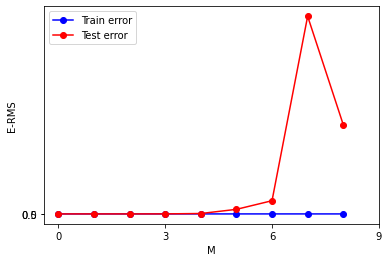

In [1627]:
plt.plot(train_error, label="Train error", marker='o', color='blue')
plt.plot(test_error, label="Test error", marker='o', color='red')

x_ticks = np.arange(0, 10, 3)
plt.xticks(x_ticks)

y_ticks = np.arange(0, 1, 0.5)
plt.yticks(y_ticks)

plt.xlabel("M")
plt.ylabel("E-RMS")

plt.legend(loc="best")

plt.show()

### Now generate 100 more data and fit 9th order model and draw fit

In [1628]:
# uniform distribution
new_samples = 120
X_new = np.sort(np.random.uniform(0, 1, new_samples))
# X_new = np.sort(np.random.uniform(0, 1, new_samples))[:, np.newaxis]
# print(X_new)

# Sample N from the normal gaussian distribution 
N_new = np.random.normal(0, 1)
# print(N_new)

y_new = np.sin(2*np.pi*X_new) + N_new * 0.1
# print(y_new)

[]

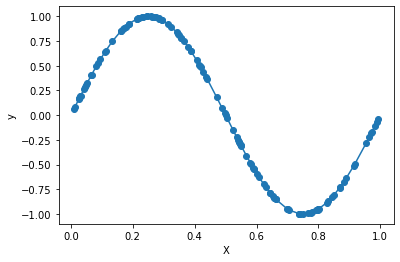

In [1629]:
plt.scatter(X_new, y_new)
plt.plot(X_new, y_new)
plt.xlabel("X")
plt.ylabel("y")
plt.plot()

In [1630]:
X_train_new, y_train_new, X_test_new, y_test_new = train_test_split(X_new, y_new, test_size=0.5)

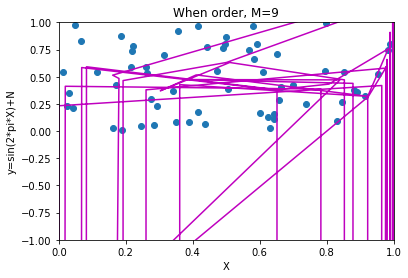

In [1631]:
d = 9
pipeline = make_pipeline(PolynomialFeatures(d), LinearRegression())
pipeline.fit(X_train_new[:, np.newaxis], y_train_new)
preds = pipeline.predict(X_test_new[:, np.newaxis])

show_plot(str(d), X_train_new, y_train_new, X_test_new, preds)

# d = 9
# pipeline = make_pipeline(PolynomialFeatures(d), LinearRegression())
# pipeline.fit(X_train_new, y_train_new)
# preds = pipeline.predict(X_test_new)

# show_plot(str(d), X_train_new, y_train_new, X_test_new, preds)

In [1632]:
# plt.scatter(X_new, y_new, s=10)
# plt.plot(X_train_new, preds, color='m')
# plt.title('When order,M =9')
# plt.xlabel('X')
# plt.ylabel('y=sin(2*pi*X)+N')
# plt.show()

### Now we will regularize using the sum of weights.

we will use L2 Regularisation - Ridge Regression

In [1633]:
train_error_ridge = []
test_error_ridge = []

def ridge_regularization(lambda_value):
  d = 9

  pipeline = make_pipeline(PolynomialFeatures(d))
  X_train_new_transformed = pipeline.fit_transform(X_train_new[:, np.newaxis], y_train_new)
  ridge_model = Ridge(alpha=lambda_value)
  ridge_model.fit(X_train_new_transformed, y_train_new)

  y_pred_train_ridge = ridge_model.predict(X_train_new_transformed)
  train_ridge_loss = np.sqrt(mean_squared_error(y_train_new, y_pred_train_ridge))
  train_error_ridge.append(train_ridge_loss)

  X_test_new_transformed = pipeline.fit_transform(X_train_new[:, np.newaxis])
  y_pred_test_ridge = ridge_model.predict(X_test_new_transformed)
  test_ridge_loss = np.sqrt(mean_squared_error(y_test_new, y_pred_test_ridge))
  test_error_ridge.append(test_ridge_loss)
  
  return ridge_model

### Draw chart for lambda is 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 

In [1634]:
def ridge_chart(lambda_value, pred_ridge):
  plt.scatter(X_train_new, y_train_new)
  plt.plot(X_test_new, pred_ridge, label=lambda_value)
  plt.title('When Lambda = '+str(lambda_value))
  plt.legend()

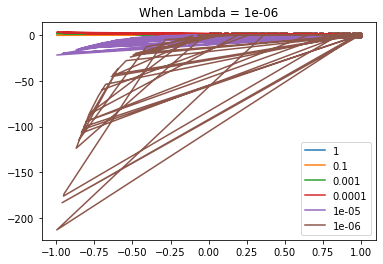

In [1635]:
# lambda_values = [1, 1/10, 1/100, 1/1000, 1/10000, 1/100000]
for i in range(len(lambda_values)):
  pipeline = make_pipeline(PolynomialFeatures(d))
  X_test_new_transformed = pipeline.fit_transform(X_test_new[:, np.newaxis])
  
  model = ridge_regularization(lambda_values[i])
  pred_ridge = model.predict(X_test_new_transformed)

  ridge_chart(lambda_values[i], pred_ridge)

### Now draw test  and train error according to lamda = 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 

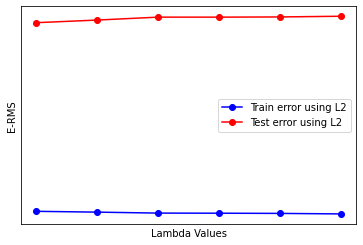

In [1636]:
plt.plot(train_error_ridge, label="Train error using L2", marker='o', color='blue')
plt.plot(test_error_ridge, label="Test error using L2", marker='o', color='red')

plt.xticks([])
plt.yticks([])

plt.xlabel("Lambda Values")
plt.ylabel("E-RMS")

plt.legend(loc="best")

plt.show()

### Best Model (According to test performance)

# References

https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
